In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## Acknowledgements
### Asistance from AI Tools
- **ChatGPT**: ChatGPT was used for:
    - **Error Handling**: Diagnosing and resolving coding errors
    - **Code Description**: Providing explanations and descriptions of code
- **Github Copilot**: Github Copilot was used for:
    - **Code Writing**: Assiting in writing code snippets
    - **Code Optimization**: Providing suggestions for code improvement and optimization

## Lets import the data into a dataframe.

In [21]:
# Let's load the new datasets provided for the Spaceship Titanic Competition
train_data_path = 'train.csv'
train_data = pd.read_csv(train_data_path)

test_data_path = 'test.csv'
test_data = pd.read_csv(test_data_path)

## Let us do a basic exploration of the dataset

In [22]:
# Displaying the first few rows of the new training and test data to understand their structure
train_data_head = train_data.head()
test_data_head = test_data.head()

train_data_head, test_data_head

(  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
 0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
 1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
 2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
 3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
 4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   
 
    RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
 0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
 1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
 2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
 3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
 4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   
 
    Transported  
 0        False  
 1         True  
 2        False  
 3        False  


In [23]:
# Lets check the shape of the training and test data
train_data.shape , test_data.shape

((8693, 14), (4277, 13))

The data has 14 columns and 8693 rows for the training data and 13 columns and 4277 rows for the test data. We will look at the data types of the columns by running the info command on each dataset.

In [24]:
# Let's check the data types of the columns in the training data

train_data_head.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   5 non-null      object 
 1   HomePlanet    5 non-null      object 
 2   CryoSleep     5 non-null      object 
 3   Cabin         5 non-null      object 
 4   Destination   5 non-null      object 
 5   Age           5 non-null      float64
 6   VIP           5 non-null      object 
 7   RoomService   5 non-null      float64
 8   FoodCourt     5 non-null      float64
 9   ShoppingMall  5 non-null      float64
 10  Spa           5 non-null      float64
 11  VRDeck        5 non-null      float64
 12  Name          5 non-null      object 
 13  Transported   5 non-null      bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 653.0+ bytes


In [25]:
# Let's check the data types of the columns in the test data
test_data_head.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   5 non-null      object 
 1   HomePlanet    5 non-null      object 
 2   CryoSleep     5 non-null      object 
 3   Cabin         5 non-null      object 
 4   Destination   5 non-null      object 
 5   Age           5 non-null      float64
 6   VIP           5 non-null      object 
 7   RoomService   5 non-null      float64
 8   FoodCourt     5 non-null      float64
 9   ShoppingMall  5 non-null      float64
 10  Spa           5 non-null      float64
 11  VRDeck        5 non-null      float64
 12  Name          5 non-null      object 
dtypes: float64(6), object(7)
memory usage: 648.0+ bytes


In [26]:
# Let's check numerical data of training data
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [27]:
# Let's check numerical data of test data
test_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [28]:
# Let's check the number of missing values in the training
train_data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [29]:
# Let's check the number of missing values in the test data
test_data.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

## Bar chart for label column: Transported


<Axes: xlabel='Transported'>

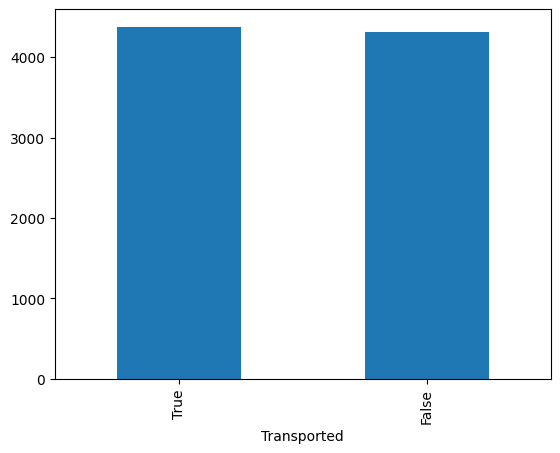

In [30]:
plot_df = train_data['Transported'].value_counts()
plot_df.plot(kind="bar")

## Lets begin with data processing

Using information from Spaceship Titanic with TFDF. We will deal with the null int values by replacing them with zero. This allows the model to handle the missing values in only the categorical columns.

Also we will split the ```Cabin``` colum and create 3 new columns ```Deck, Cabin_num``` and ```Side```. This will be easier to train the model on the individual data. Once split the original ```Cabin``` column will be deleted.

Author: https://www.kaggle.com/code/gusthema/spaceship-titanic-with-tfdf

In [31]:
train_data[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = train_data[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=0)
train_data[["Deck", "Cabin_num", "Side"]] = train_data["Cabin"].str.split("/", expand=True)

try:
    train_data = train_data.drop('Cabin', axis=1)
except KeyError:
    print("Field does not exist")

2 step data preparation process for machine learning modeling:

1. **Feature Selection**:
   - The code selects features and the target variable from the `train_data` dataframe.
   - `X` is defined as all columns in `train_data` except `'Transported'`, `'PassengerId'`, `'Name'`, and `'VIP'`.
     - `'Transported'` is the target variable and thus excluded from the feature set.
     - `'PassengerId'` and `'Name'` are likely non-predictive identifiers and are therefore excluded.
     - `'VIP'` is also excluded, possibly based on prior analysis indicating it may not be useful for prediction, or to test its impact on model performance.
   - `y` is set to the `'Transported'` column of `train_data`, representing the target variable for the classification task.

2. **Training and Validation Split**:
   - The dataset is split into training and validation sets using `train_test_split`.
   - `X_train` and `y_train` are the training features and labels, respectively.
   - `X_val` and `y_val` are the validation features and labels, used to evaluate the model's performance.
   - The `test_size=0.2` parameter specifies that 20% of the data is reserved for the validation set.
   - `random_state=42` ensures that the split is reproducible, meaning the same split will occur each time the code is run.

In [32]:
# Selecting features and target variable from the training data
X = train_data.drop(['Transported', 'PassengerId', 'Name', 'VIP'], axis=1)
y = train_data['Transported']

# Splitting the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

The model is than identifies the types of features in the dataset:

- `numerical_features`: These are columns in `X_train` that contain numerical data (integer or float). The `select_dtypes` method is used to filter columns based on their data type, in this case, `['int64', 'float64']`.

- `categorical_features`: Similarly, these are columns in `X_train` that contain categorical data, which includes `object` and `bool` data types. These features are often non-numeric or are categorical in nature.


Then defines two transformers for preprocessing the data:

1. **Numerical Transformer**:
   - `numerical_transformer` uses `SimpleImputer` with the strategy set to `'median'`. This transformer will fill in missing values in numerical columns using the median value of each column.

2. **Categorical Transformer**:
   - `categorical_transformer` is a pipeline that combines two steps:
     - The first step uses `SimpleImputer` with the strategy set to `'most_frequent'` to fill in missing values in categorical columns using the most frequent value (mode) of each column.
     - The second step uses `OneHotEncoder` to convert categorical variables into a form that could be provided to machine learning algorithms. It creates binary (dummy) variables from categorical features and handles unknown categories encountered during transformation by ignoring them (`handle_unknown='ignore'`).

In [33]:
# Identifying numerical and categorical features
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object', 'bool']).columns

# Creating transformers for numerical and categorical features
numerical_transformer = SimpleImputer(strategy='median')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

#### Then sets up a preprocessor for the machine learning pipeline:

- `preprocessor` is an instance of `ColumnTransformer` from scikit-learn, which allows different columns or column subsets of the input to be transformed separately.
- It consists of two main transformers, specified in the `transformers` list:
  - **Numerical Transformer (`'num'`)**: Applies the `numerical_transformer` defined earlier to the `numerical_features` in the dataset. This transformer imputes missing values in numerical columns using the median value.
  - **Categorical Transformer (`'cat'`)**: Applies the `categorical_transformer` pipeline to the `categorical_features`. This pipeline first imputes missing values using the most frequent value and then applies one-hot encoding to convert categorical variables into a format suitable for machine learning models.



#### Also defines a machine learning pipeline:

- `model_new` is a pipeline object created using scikit-learn's `Pipeline`. It organizes two main steps in the machine learning process:
  - **Data Preprocessing (`'preprocessor'`)**: The first step in the pipeline is the `preprocessor` defined above. It applies the respective transformations to the numerical and categorical features of the dataset.
  - **Model Training (`'classifier'`)**: The second step in the pipeline is a RandomForestClassifier. This classifier is a popular ensemble learning method, well-suited for classification tasks. It operates by constructing a multitude of decision trees during training for robust and accurate predictions. The `random_state=42` parameter ensures reproducibility of the results.

#### Hyperparameter Tuning using GridSearchCV

A `param_grid` dictionary is defined. This grid specifies the different hyperparameters and the range of values to be tested for the Random Forest Classifier in the machine learning pipeline. The parameters included are:
- **`n_estimators`**: The number of trees in the forest. The values tested are 100, 200, and 300.
- **`max_features`**: The number of features to consider when looking for the best split. The options tested are `'sqrt'`, `'log2'`, and `None`.
- **`max_depth`**: The maximum depth of the trees. The values tested are 10, 20, 30, and `None` (which means unlimited depth).
- **`min_samples_split`**: The minimum number of samples required to split an internal node. The values tested are 2, 5, and 10.
- **`min_samples_leaf`**: The minimum number of samples required to be at a leaf node. The values tested are 1, 2, and 4.

#### GridSearchCV Object Creation

A `GridSearchCV` object is created, using the `model_new` pipeline as the base estimator. The key components of this object include:

- **Estimator (`model_new`)**: This is the machine learning pipeline which includes preprocessing steps and the Random Forest Classifier.
- **Parameter Grid (`param_grid`)**: The grid of parameters with the range of values to test.
- **Cross-validation (`cv=3`)**: This indicates that a 3-fold cross-validation will be used. In each iteration, the dataset is split into 3 parts, 2 for training and 1 for testing, and this process is repeated 3 times.
- **Parallel Processing (`n_jobs=-1`)**: This enables the use of all available CPU cores for parallel processing, speeding up the grid search process.
- **Verbosity (`verbose=2`)**: This setting controls the level of verbosity (the amount of messages the grid search will output during its execution).

The `grid_search.fit(X_train, y_train)` call (not shown in this snippet) would then be used to execute the grid search on the provided training data (`X_train`, `y_train`), iterating through the combinations of hyperparameters in the `param_grid`.

In [34]:
# Creating a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Creating a pipeline with a Random Forest Classifier
model_new = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', RandomForestClassifier(random_state=42))])

# Define the parameter grid to tune the hyperparameters
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_features': ['sqrt', 'log2', None],
    'classifier__max_depth': [10, 20, 30, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
}

# Creating a grid search object
grid_search = GridSearchCV(model_new, param_grid, cv=3, n_jobs=-1, verbose=2)


In [35]:
# Fitting the grid search
grid_search.fit(X_train, y_train)

# Getting the best parameters
best_params = grid_search.best_params_

Fitting 3 folds for each of 324 candidates, totalling 972 fits


In [38]:
# Training the model with the best parameters
grid_search.best_estimator_.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['HomePlanet', 'CryoSleep', 'Destination', 'Deck', 'Cabin_num', 'Side'], dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(max_depth=10, max_features=None,
                                        min_samples_leaf=2, n_estimators=300,
                                        random_state=42))])

## Create the Submission

3 steps are preformed on the ```test.csv``` file:

1. **Filling Missing Values in Selected Columns**:
   - The code fills missing values in the columns `['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']` with `0`.
   - This is based on the assumption that missing values in these columns can be interpreted as a lack of expenditure or absence of these features (e.g., not being a VIP, not using CryoSleep, or not spending in various facilities).
   - This is done using the `fillna(value=0)` method on the specified columns.

2. **Splitting the 'Cabin' Column**:
   - The 'Cabin' column is split into three new columns: `['Deck', 'Cabin_num', 'Side']`.
   - This is achieved using the `str.split('/', expand=True)` method, which separates the 'Cabin' string based on the '/' delimiter and expands the split strings into separate columns.
   - This step is crucial for transforming the 'Cabin' data into a more usable format for model input.

3. **Dropping the Original 'Cabin' Column**:
   - After extracting the necessary information from the 'Cabin' column, it is dropped from the dataframe using `test_data.drop('Cabin', axis=1)`.
   - A `try-except` block is used to handle the potential `KeyError` if the 'Cabin' column does not exist or has already been dropped, ensuring the code's robustness.

In [36]:
test_data[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = test_data[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=0)
test_data[["Deck", "Cabin_num", "Side"]] = test_data["Cabin"].str.split("/", expand=True)

try:
    test_data = test_data.drop('Cabin', axis=1)
except KeyError:
    print("Field does not exist")

In [37]:
# Extract features from test data
X_test = test_data.drop(['PassengerId', 'Name'], axis=1)

# Making predictions on the new test set
best_model = grid_search.best_estimator_
test_predictions = best_model.predict(X_test)

# Create a submission DataFrame
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Transported': test_predictions
})

# Save the submission file
submission.to_csv('spaceship_titanic_submission.csv', index=False)